$Python Project$

* Objective --

    San Analytics has hired 10 external consultants to work on their project. As part of the financial deal, each consultant gets paid hourly. For every extra hour after 8 hours, the payment is extra. 
    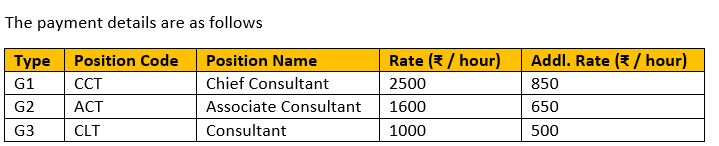
    * The number of hours that the consultant has worked will be taken from the attendance register. The register marks the in and out time of each consultant from Monday to Friday. (Saturday and Sunday are holidays and any work done on these days are not considered for any extra payments.
    * **Develop a python project to calculate the monthly payouts of each consultant, total hours worked in each month and holidays taken in each month. Also include any other calculation that you think is appropriate.**



**Technical implementation guidelines --**
*	Use OOPs to develop this application
*	DO NOT HARDCODE attendance data
*	Give valid and meaningful consultant names (eg: Amit, Priya etc..). Avoid using abbreviated names like ‘abc’, ‘kri’ etc.
*	Take any 3 months and a year (eg: April , May, June of year 2022) to generate random register data for each consultant. 
*	Randomly assign leaves. This is optional
*	Ensure proper data format for each column 

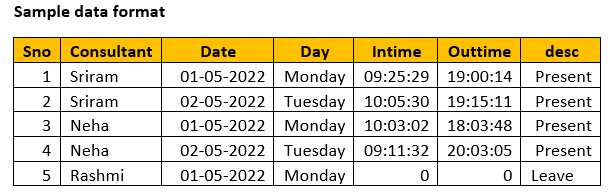

* HINT
    *	Use the **datetime** and its related libraries of python for date and time operations.


In [ ]:
# basic importation

import datetime
import pandas as pd
import numpy as np
import calendar
from datetime import date
from IPython.display import display

#### Creating Class

In [ ]:
class employees:
    def __init__(self):
        self.year = 2022
        self.month = int(input("Enter the starting Month : "))
        
        self.E_name = ["Aditi Kumar","Aditya Roy","Riya Ghosal",
          "Ravindra Sharma","Jaydeep Mittal","Jitendra Choudhary",
          "Naveena Rajan","Deepak Chopra","Kumar Avnish","Anita Bajaj"]
        self.Type =["G1","G3","G3","G2","G1","G1","G2","G1","G2","G1"]
        
    def dates(self):
        months =[]
        for i in range(3):
            months.append(self.month+i)   
        days =[]
        for month in months:
            if month in [1,3,5,7,8,10,12]:
                days.append(31)
            elif month ==2:
                days.append(28)
            elif month in [4,6,9,11]:
                days.append(30)
                
        d =[];m=[]
        for day,mn in zip(days,months):
            for i in range (1,day+1):
                m.append(mn)
                d.append(i)
                
        self.dates = pd.DataFrame({"date":d,"month":m,"year":self.year})
        all_dates1=[]
        for i in range(0,len(d)):
            all_dates1.append(str(self.dates["year"][i])+"-"+str(self.dates["month"][i])
                            +"-"+str(self.dates["date"][i]))
        self.month = m
        self.all_dates = pd.DataFrame({"all_dates":all_dates1})
        return self.all_dates
    
    def weekdays(self): # adding dates
        w_d = []
        for i in range(0,len(self.all_dates)):
            w_d.append(calendar.weekday(self.dates["year"][i],self.dates["month"][i],self.dates["date"][i]))
            # using calendar module to get the day in terms of numbers
            
        self.w_d = pd.DataFrame({"weekdays":w_d})
        all_days = {0: "Monday", 1:"Tuesday", 2:"Wednesday", 3:"Thursday",4:"Friday", 5:"Saturday",6:"Sunday"}
        
        
        wds = []
        for i in self.w_d["weekdays"].values:
            wds.append(all_days.get(i))
        
        self.weekdays = pd.DataFrame({"weekdays":wds})
        
        self.dates_weekdays = pd.DataFrame({"Dates":self.all_dates["all_dates"].values,
                                            "weekdays":self.weekdays["weekdays"].values})
        
        # workday / holiday
        a = []
        for i in range(0,len(self.all_dates)):
            if self.dates_weekdays["weekdays"][i] in ["Saturday","Sunday"]:
                a.append("Holiday")
            else :
                a.append("Workday")
        self.weekday_holiday = pd.DataFrame({"Dates":self.all_dates["all_dates"].values,
                                             "Month":self.month,
                                            "weekdays":self.weekdays["weekdays"].values,
                                            'weekday_holiday':a})
        return self.weekday_holiday
    
    def sal_stat(self):
        self.sal_stat = pd.DataFrame({"Type":["G1","G2","G3"],"Position_Code":["CCT","ACT","CLT"],
              "Position_Name":["Chief Consultant","Associate Consultant","Consultant"]
              ,"Rate(₹/hour)":[2500,1600,1000],"Addl.Rate(₹/hour)":[850,650,500]})
        return self.sal_stat
    def working_days_time(self):
        self.working_days = self.weekdays.reset_index().drop(columns="index",axis = 1)
        kj = [];kl = [];km=[];kn=[];ko=[];kp=[];mn =[]
        for i,j in zip(e1.E_name,e1.Type):
            for k,l,m,n,o in zip(self.weekday_holiday.Dates,self.weekday_holiday.Month,self.working_days.weekdays,
                               self.weekday_holiday.weekday_holiday,range(len(self.weekday_holiday))):
                kp.append(j)
                ko.append(i)
                kj.append(k)
                mn.append(l)
                kl.append(m)
                km.append(n)
                kn.append(o)
        
        self.emp_db =pd.DataFrame({"Day_no":kn,"Emp_name":ko,"Type":kp,"Dates":kj,"Month":mn,
                              "weekdays":kl,"weekday_holiday":km})
        
        # adding Position_Code,Position_Name,Rate(₹/hour),Addl.Rate(₹/hour)

        self.sal_stat = pd.DataFrame({"Type":["G1","G2","G3"],"Position_Code":["CCT","ACT","CLT"],
              "Position_Name":["Chief Consultant","Associate Consultant","Consultant"]
              ,"Rate(₹/hour)":[2500,1600,1000],"Addl.Rate(₹/hour)":[850,650,500]})
        
        t = [];p_c =[];p_n=[];r_h =[];a_r_h = []
        for v in self.emp_db["Type"].values:
            for i,j,x,y,z in zip(self.sal_stat["Type"].values,self.sal_stat["Position_Code"].values,
                                 self.sal_stat["Position_Name"].values,
                                     self.sal_stat["Rate(₹/hour)"].values,self.sal_stat["Addl.Rate(₹/hour)"].values):
                if i == v:
                    t.append(v)
                    p_c.append(j)
                    p_n.append(x)
                    r_h.append(y)
                    a_r_h.append(z)
                    
        self.emp_db["Position_Code"] = p_c
        self.emp_db["Position_Name"] = p_n
        self.emp_db["Rate(₹/hour)"] = r_h
        self.emp_db["Addl.Rate(₹/hour)"] = a_r_h
        
        # present or Leave
        desc1 =[]
        for i in range (len(self.emp_db)):
            desc1.append(np.random.random())

        desc2 =[]
        for i in range (len(self.emp_db)):
            if ((desc1[i]>=0.2)&(self.emp_db["weekday_holiday"][i]=="Workday")):
                desc2.append("Present")
            elif ((desc1[i]<0.2)|(self.emp_db["weekday_holiday"][i]=="Holiday")):
                desc2.append("Leave")

        self.emp_db["desc"]=desc2
        
        
        # intime
        hr1 =[];mi1=[];sec1 =[]
        for i in range(0,len(self.emp_db)):
            if self.emp_db["desc"][i] == "Present":
                hr1.append(np.random.randint(9,13))
                mi1.append(np.random.randint(0,59))
                sec1.append(np.random.randint(0,59))
            else:
                hr1.append(0)
                mi1.append(0)
                sec1.append(0)

        self.emp_db["i_hour"]=hr1
        self.emp_db["i_minute"]=mi1
        self.emp_db["i_seconds"]=sec1


        # out time

        hr2 =[];mi2=[];sec2 =[]
        for i in range(0,len(self.emp_db)):
            if self.emp_db["desc"][i] == "Present":
                hr2.append(np.random.randint(18,25))
                mi2.append(np.random.randint(0,60))
                sec2.append(np.random.randint(0,60))
            else:
                hr2.append(0)
                mi2.append(0)
                sec2.append(0)

        self.emp_db["o_hour"]=hr2
        self.emp_db["o_minute"]=mi2
        self.emp_db["o_seconds"]=sec2
        
        # adding intime and out time to the dataframe
        in_time =[]
        for i in range (0,len(self.emp_db)):
            if self.emp_db["desc"][i] == "Present":
                in_time.append(str(self.emp_db["i_hour"][i])+":"+str(self.emp_db["i_minute"][i])+":"
                               +str(self.emp_db["i_seconds"][i]))
            else:
                in_time.append(0)

        self.emp_db["in_time"] = in_time


        out_time =[]
        for i in range (0,len(self.emp_db)):
            if self.emp_db["desc"][i] == "Present":
                out_time.append(str(self.emp_db["o_hour"][i])+":"+str(self.emp_db["o_minute"][i])+":"
                                +str(self.emp_db["o_seconds"][i]))
            else:
                out_time.append(0)
        self.emp_db["out_time"] = out_time
        self.emp_db["Dates"]=pd.to_datetime(self.emp_db["Dates"])
        
        return self.emp_db
        
    def payout(self):
        self.emp_db2 = self.emp_db.loc[:]
        
        l1 =[]
        for i in range(len(self.emp_db2)):
            l1.append((self.emp_db2["o_hour"][i]*3600+self.emp_db2["o_minute"][i]*60+self.emp_db2["o_seconds"][i] )-
                      (self.emp_db2["i_hour"][i]*3600+self.emp_db2["i_minute"][i]*60+self.emp_db2["i_seconds"][i]))


        h = [];m = [];s = []
        for i in l1:
            h.append(i// 3600)
            m.append((i % 3600) // 60)
            s.append(i% 60)

        w_t = []
        for i in range(len(l1)):
            w_t.append(str(h[i])+":"+str(m[i])+":"+str(s[i]))

        self.emp_db2["Total_sec"]  =l1
        self.emp_db2["Working_hr"] = h  
        self.emp_db2["Working_min"] = m
        self.emp_db2["Working_sec"] = s
        self.emp_db2["Working_Time"] = w_t
        
        return self.emp_db2
    def sal_per_day(self):
        
        self.emp_db3 = self.emp_db2.loc[:]
        sal = []
        for i in range(len(self.emp_db3)): 
            if self.emp_db3.Total_sec[i] <=8*3600:
                u1 = self.emp_db3.Total_sec[i]*self.emp_db3["Rate(₹/hour)"][i]
                u2 = round(u1/3600,2)
                sal.append(u2)
            elif self.emp_db3.Total_sec[i] >8*3600:
                u1 = 8*3600*self.emp_db3["Rate(₹/hour)"][i]
                u2 = round((u1/3600),2)
                u3 = round((self.emp_db3.Total_sec[i]-8*3600)*(self.emp_db3["Addl.Rate(₹/hour)"][i])/3600,2)
                sal.append(u2+u3)
                
        self.emp_db3["Sal/day"] = sal
        
        return self.emp_db3

#### Calling the class and methods

In [ ]:
# calling the class and methods

e1 = employees()
ep = e1.dates()
ty = e1.weekdays()
e2 = e1.working_days_time()

Enter the starting Month : 4


In [ ]:
e1.sal_stat

,Type,Position_Code,Position_Name,Rate(₹/hour),Addl.Rate(₹/hour)
0,G1,CCT,Chief Consultant,2500,850
1,G2,ACT,Associate Consultant,1600,650
2,G3,CLT,Consultant,1000,500


In [ ]:
employee_data = e1.payout()
employee_sal_data = e1.sal_per_day()

In [ ]:
# careating a copy of the dataframe
employee_data1 =employee_data.loc[:,["Emp_name","Dates","weekdays","in_time","out_time","desc","Working_Time"]]

In [ ]:
employee_data1.head()

,Emp_name,Dates,weekdays,in_time,out_time,desc,Working_Time
0,Aditi Kumar,2022-04-01,Friday,11:34:10,24:50:22,Present,13:16:12
1,Aditi Kumar,2022-04-02,Saturday,0,0,Leave,0:0:0
2,Aditi Kumar,2022-04-03,Sunday,0,0,Leave,0:0:0
3,Aditi Kumar,2022-04-04,Monday,10:31:28,23:34:59,Present,13:3:31
4,Aditi Kumar,2022-04-05,Tuesday,11:23:34,24:50:24,Present,13:26:50


In [ ]:
# sal adding in the dataframe

employee_sal_data1  = employee_sal_data.loc[:,["Emp_name","Dates","weekdays","in_time","out_time","desc","Working_Time","Sal/day"]]
employee_sal_data1.head()

,Emp_name,Dates,weekdays,in_time,out_time,desc,Working_Time,Sal/day
0,Aditi Kumar,2022-04-01,Friday,11:34:10,24:50:22,Present,13:16:12,24479.50
1,Aditi Kumar,2022-04-02,Saturday,0,0,Leave,0:0:0,0.00
2,Aditi Kumar,2022-04-03,Sunday,0,0,Leave,0:0:0,0.00
3,Aditi Kumar,2022-04-04,Monday,10:31:28,23:34:59,Present,13:3:31,24299.82
4,Aditi Kumar,2022-04-05,Tuesday,11:23:34,24:50:24,Present,13:26:50,24630.14


### Question: Calculating the monthly payouts of each consultant, total hours worked in each month and holidays taken in each month. 

##### Monthly payouts of each consultant


Payout in month : 4


Emp_name
Aditi Kumar           11917.89
Aditya Roy             3867.99
Anita Bajaj           12956.95
Deepak Chopra         13186.40
Jaydeep Mittal        13690.19
Jitendra Choudhary    13754.49
Kumar Avnish           9490.84
Naveena Rajan          8497.48
Ravindra Sharma        7342.11
Riya Ghosal            5039.17
Name: Sal/day, dtype: float64


Payout in month : 5


Emp_name
Aditi Kumar           12134.38
Aditya Roy             4722.72
Anita Bajaj           13124.79
Deepak Chopra         10528.38
Jaydeep Mittal        11164.18
Jitendra Choudhary    13296.62
Kumar Avnish           7805.76
Naveena Rajan          7708.00
Ravindra Sharma        7333.65
Riya Ghosal            4935.59
Name: Sal/day, dtype: float64


Payout in month : 6


Emp_name
Aditi Kumar           11950.77
Aditya Roy             5330.67
Anita Bajaj           12308.66
Deepak Chopra         12918.02
Jaydeep Mittal        11615.07
Jitendra Choudhary    11742.75
Kumar Avnish           9602.47
Naveena Rajan          8569.21
Ravindra Sharma        8988.73
Riya Ghosal            6072.56
Name: Sal/day, dtype: float64

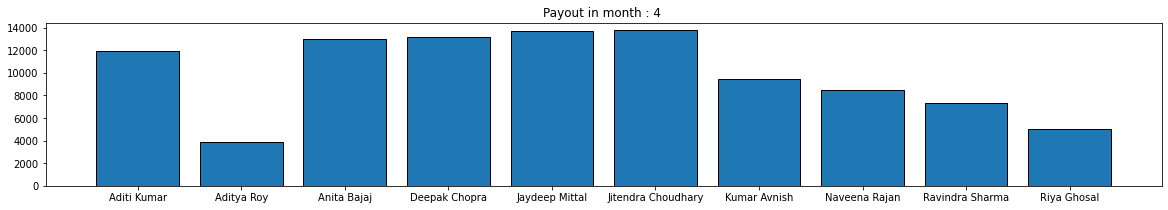

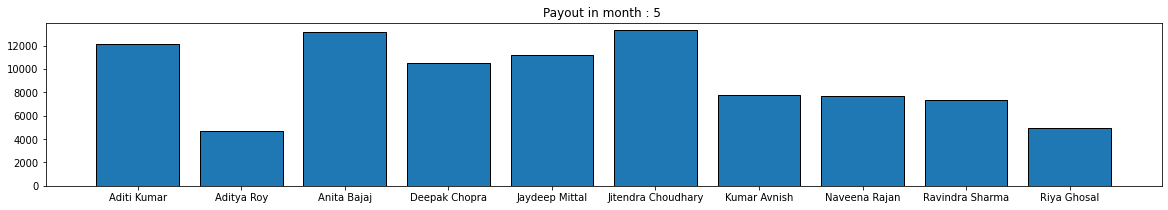

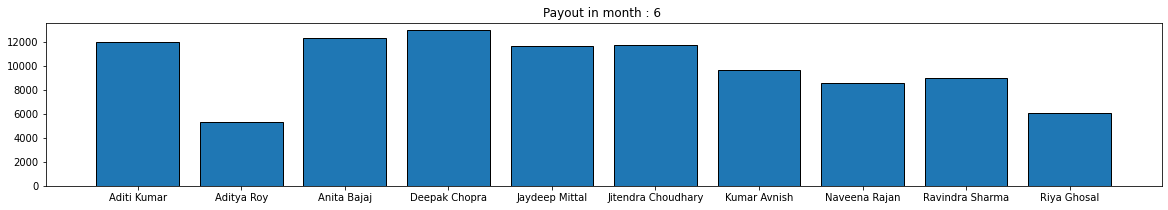

In [ ]:
# Monthly payouts of each consultant

emp_db1 = employee_sal_data.loc[:]
import matplotlib.pyplot as plt
import seaborn as sns
for i in emp_db1["Month"].unique():
    fig,ax1 = plt.subplots(1,1,figsize=(20,3))
    m = emp_db1[emp_db1["Month"]==i]
    print(f"\nPayout in month : {i}")
    display(round(m.groupby("Emp_name")["Sal/day"].mean(),2))
    ax1.bar(m.groupby("Emp_name")["Sal/day"].mean().index,
            m.groupby("Emp_name")["Sal/day"].mean().values,edgecolor="black")
    ax1.set_title(f"Payout in month : {i} ")

##### Total hours worked in each month


Total hours worked in month : 4


,Emp_name,Total_Working_hr
0,Aditi Kumar,188.48
1,Aditya Roy,125.12
2,Anita Bajaj,184.00
3,Deepak Chopra,182.00
4,Jaydeep Mittal,195.00
5,Jitendra Choudhary,196.00
6,Kumar Avnish,217.13
7,Naveena Rajan,184.06
8,Ravindra Sharma,158.48
9,Riya Ghosal,170.60



Total hours worked in month : 5


,Emp_name,Total_Working_hr
0,Aditi Kumar,180.36
1,Aditya Roy,167.00
2,Anita Bajaj,196.00
3,Deepak Chopra,156.19
4,Jaydeep Mittal,159.29
5,Jitendra Choudhary,190.49
6,Kumar Avnish,174.58
7,Naveena Rajan,173.09
8,Ravindra Sharma,164.00
9,Riya Ghosal,180.00



Total hours worked in month : 6


,Emp_name,Total_Working_hr
0,Aditi Kumar,173.32
1,Aditya Roy,188.00
2,Anita Bajaj,177.00
3,Deepak Chopra,185.29
4,Jaydeep Mittal,157.51
5,Jitendra Choudhary,181.51
6,Kumar Avnish,218.00
7,Naveena Rajan,192.30
8,Ravindra Sharma,195.07
9,Riya Ghosal,208.00


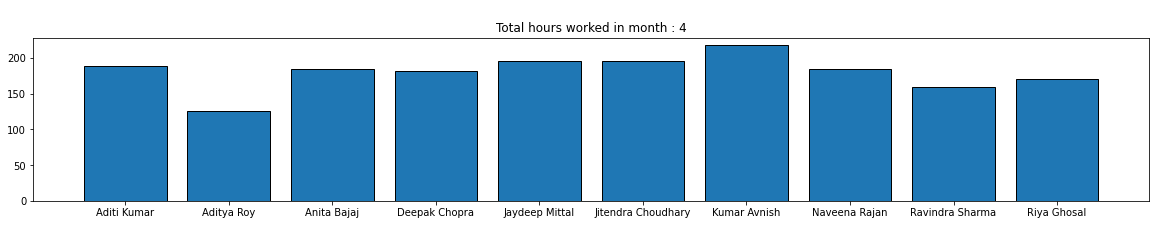

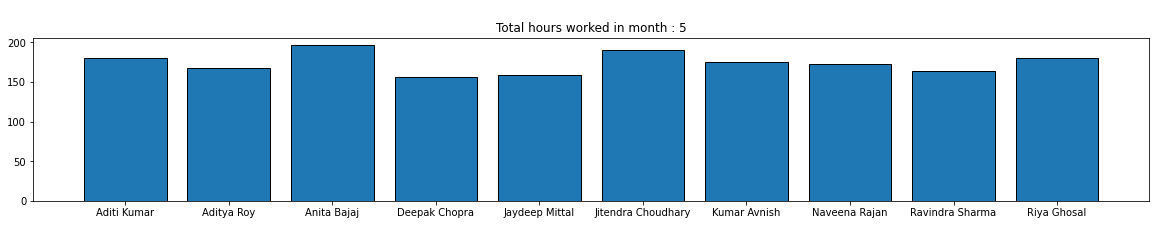

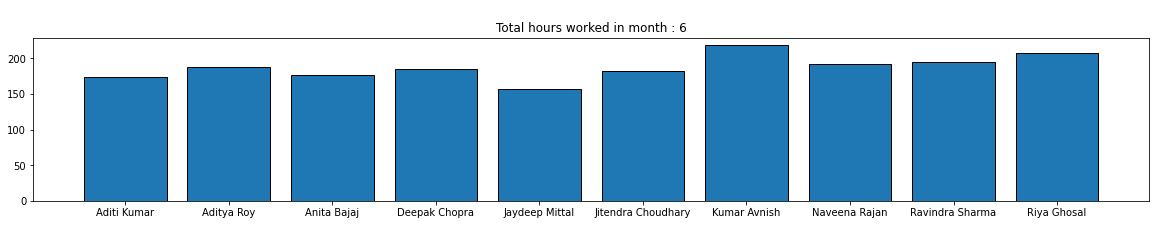

In [ ]:
# Total hours worked in each month

for i in employee_sal_data["Month"].unique():
    fig,ax1 = plt.subplots(1,1,figsize=(20,3))
    m = emp_db1[emp_db1["Month"]==i]
    print(f"\nTotal hours worked in month : {i}")
    mn = m.groupby("Emp_name")["Total_sec"].sum()/3600
    a = mn.index
    b = mn.values.tolist()

    b2=[]
    for j in b:
      if round(j %1,2)>0.6:
        b2.append(j//1 +1)

      else :
        b2.append(round(j,2))


    display(pd.DataFrame({"Emp_name":a,"Total_Working_hr":b2}))
    ax1.bar(a,b2,edgecolor="black")
    ax1.set_title(f"\nTotal hours worked in month : {i}")

##### Holidays taken in each month


Holidays taken in month : 4


Emp_name
Aditi Kumar           6
Aditya Roy            7
Anita Bajaj           3
Deepak Chopra         2
Jaydeep Mittal        2
Jitendra Choudhary    2
Kumar Avnish          2
Naveena Rajan         3
Ravindra Sharma       5
Riya Ghosal           4
Name: desc, dtype: int64


Holidays taken in month : 5


Emp_name
Aditi Kumar           5
Aditya Roy            6
Anita Bajaj           3
Deepak Chopra         7
Jaydeep Mittal        6
Jitendra Choudhary    3
Kumar Avnish          4
Naveena Rajan         5
Ravindra Sharma       6
Riya Ghosal           6
Name: desc, dtype: int64


Holidays taken in month : 6


Emp_name
Aditi Kumar           6
Aditya Roy            5
Anita Bajaj           5
Deepak Chopra         4
Jaydeep Mittal        5
Jitendra Choudhary    7
Kumar Avnish          2
Naveena Rajan         4
Ravindra Sharma       3
Riya Ghosal           2
Name: desc, dtype: int64

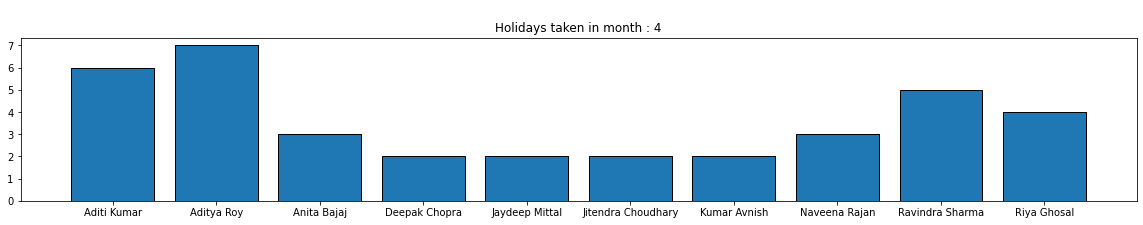

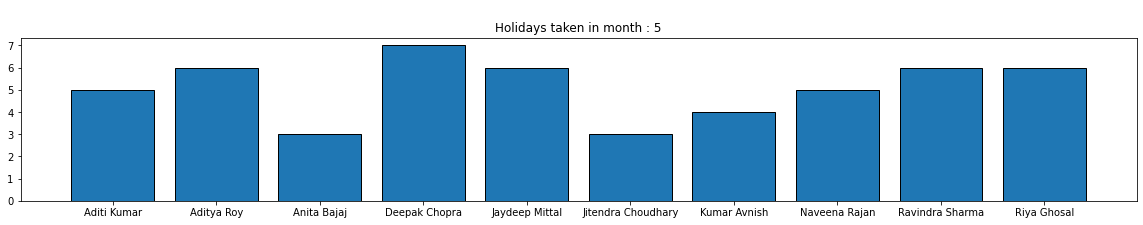

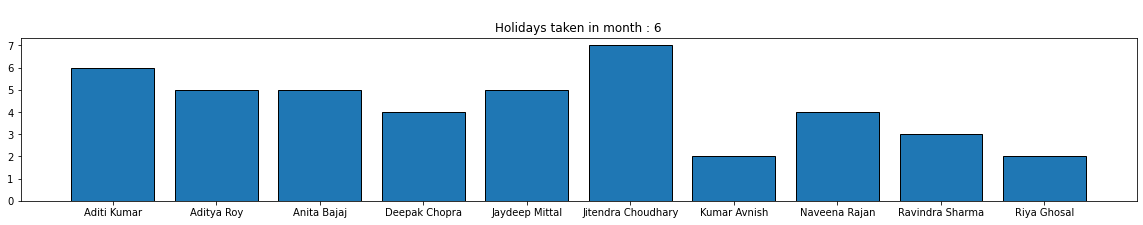

In [ ]:
# Holidays taken in each month

for i in emp_db1["Month"].unique():
    fig,ax1 = plt.subplots(1,1,figsize=(20,3))
    m = emp_db1[(emp_db1["Month"]==i)&(emp_db1["weekday_holiday"]!="Holiday")
                &(emp_db1["desc"]=="Leave")]
    
    print(f"\nHolidays taken in month : {i}")
    display(m.groupby("Emp_name")["desc"].count())
    ax1.bar(m.groupby("Emp_name")["desc"].count().index,
            m.groupby("Emp_name")["desc"].count().values,edgecolor="black")
    ax1.set_title(f"\nHolidays taken in month : {i}")

##### Employee perfomence


Holidays taken in month : 4


Emp_name
Aditi Kumar           15
Aditya Roy            14
Anita Bajaj           18
Deepak Chopra         19
Jaydeep Mittal        19
Jitendra Choudhary    19
Kumar Avnish          19
Naveena Rajan         18
Ravindra Sharma       16
Riya Ghosal           17
Name: desc, dtype: int64


Holidays taken in month : 5


Emp_name
Aditi Kumar           17
Aditya Roy            16
Anita Bajaj           19
Deepak Chopra         15
Jaydeep Mittal        16
Jitendra Choudhary    19
Kumar Avnish          18
Naveena Rajan         17
Ravindra Sharma       16
Riya Ghosal           16
Name: desc, dtype: int64


Holidays taken in month : 6


Emp_name
Aditi Kumar           16
Aditya Roy            17
Anita Bajaj           17
Deepak Chopra         18
Jaydeep Mittal        17
Jitendra Choudhary    15
Kumar Avnish          20
Naveena Rajan         18
Ravindra Sharma       19
Riya Ghosal           20
Name: desc, dtype: int64

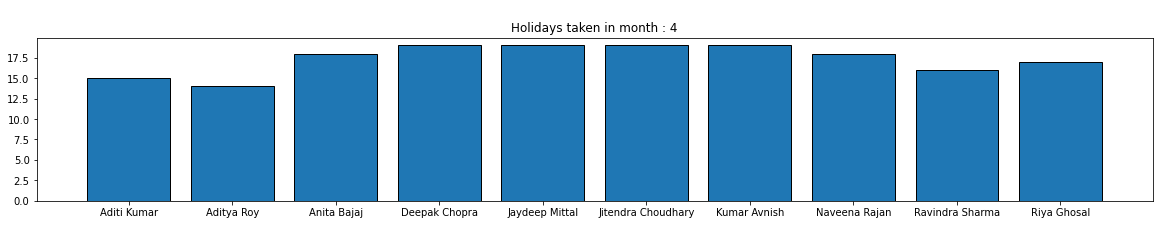

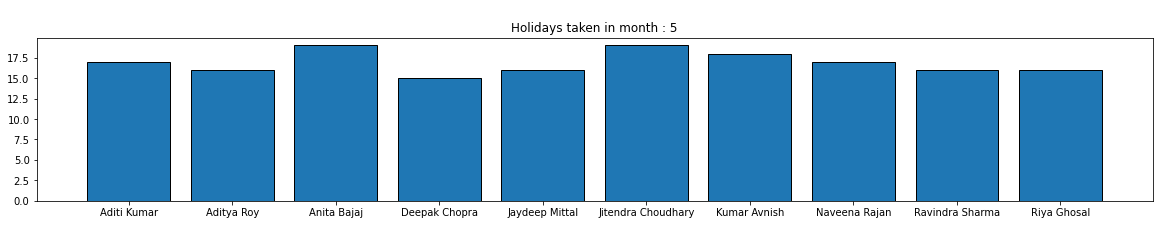

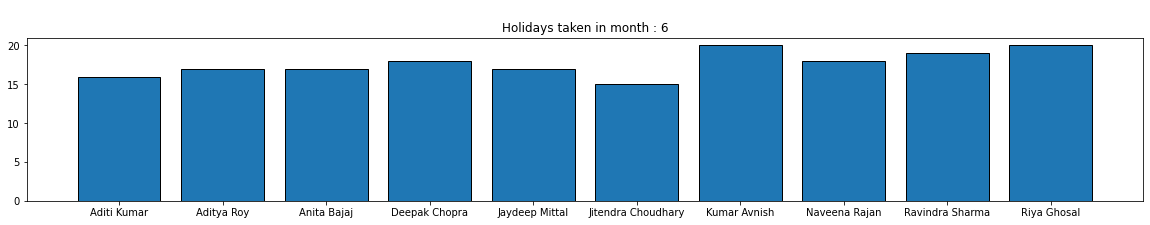

In [ ]:
# Employee perfomence

for i in emp_db1["Month"].unique():
    fig,ax1 = plt.subplots(1,1,figsize=(20,3))
    m = emp_db1[(emp_db1["Month"]==i)&(emp_db1["weekday_holiday"]!="Holiday")
                &(emp_db1["desc"]=="Present")]
    
    print(f"\nHolidays taken in month : {i}")
    display(m.groupby("Emp_name")["desc"].count())
    ax1.bar(m.groupby("Emp_name")["desc"].count().index,
            m.groupby("Emp_name")["desc"].count().values,edgecolor="black")
    ax1.set_title(f"\nHolidays taken in month : {i}")

In [ ]:
emp_db_copy=employee_sal_data.loc[:] # creating a copy of the data for further use

##### Salary stucture

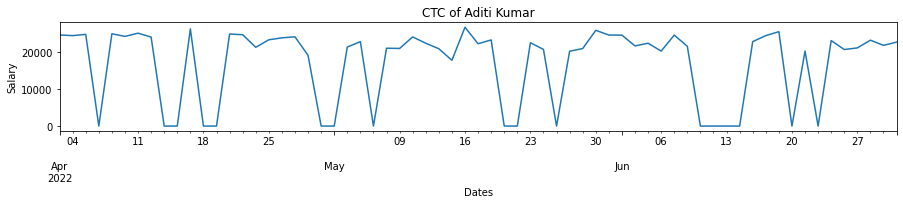

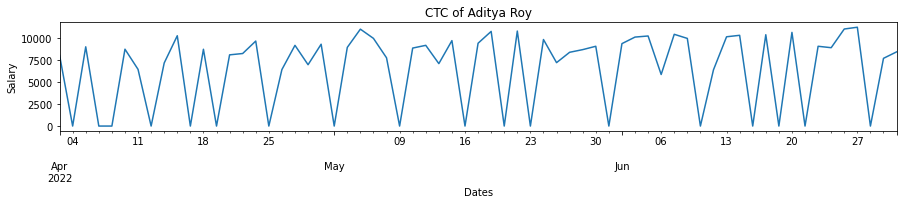

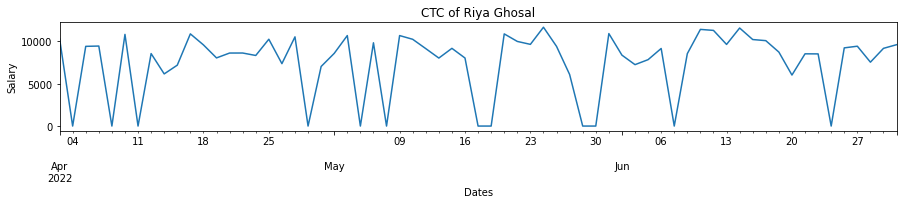

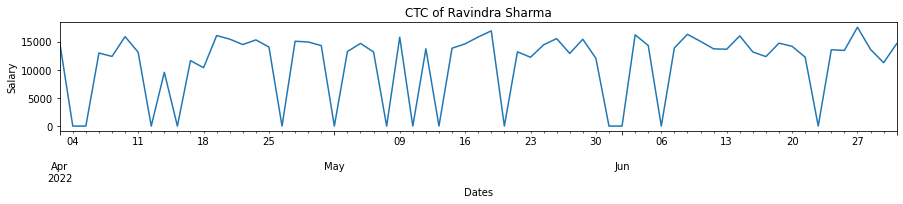

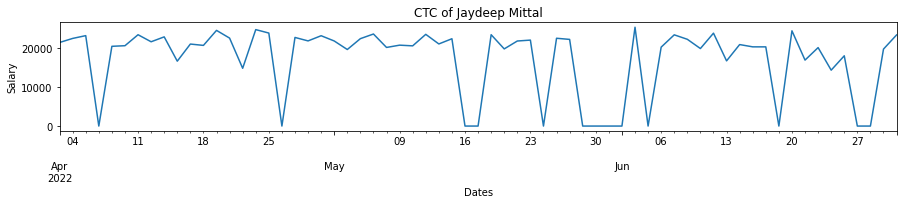

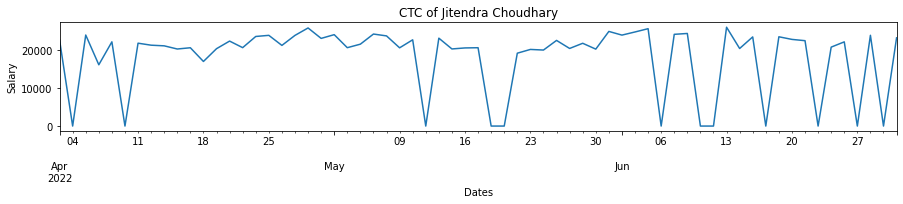

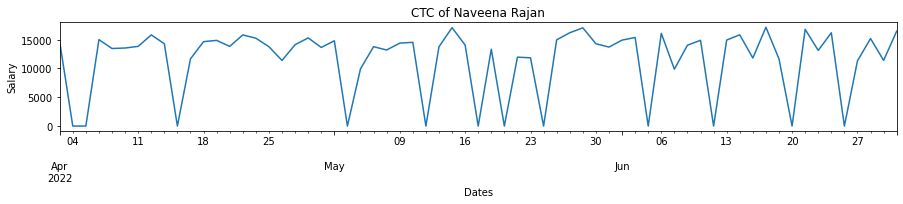

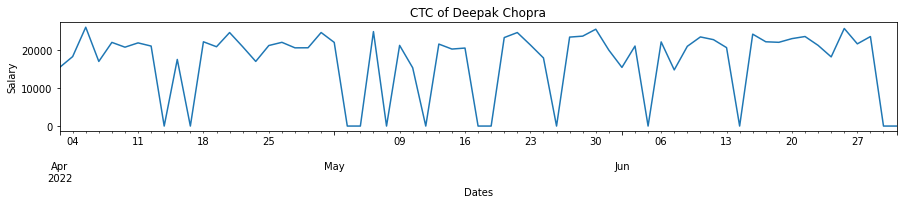

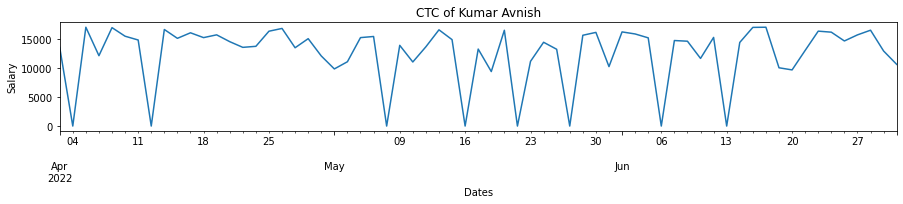

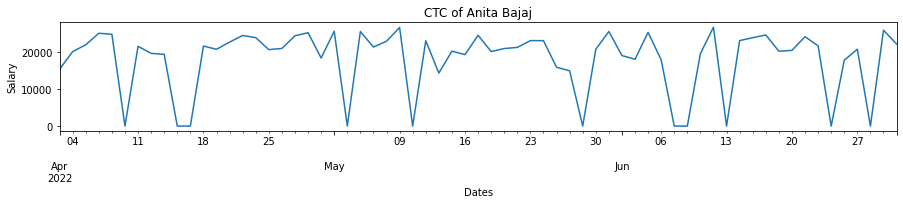

In [ ]:
# Salary stucture

for i in emp_db_copy["Emp_name"].unique():
    m = emp_db_copy[(emp_db_copy["Emp_name"]==i)&(emp_db_copy["weekday_holiday"]!="Holiday")]
    m.set_index("Dates",inplace=True)
    
    # plotting given data and forecasted values
    m["Sal/day"].plot(figsize=(15,2))
    plt.title(f"CTC of "+str(i))
    plt.ylabel("Salary")
    plt.show()

In [ ]:
emp_db1[(emp_db1["weekday_holiday"]!="Holiday")&(emp_db1["desc"]=="Present")].groupby("Emp_name")["desc"].count()
print("Total Days :",len(emp_db1[emp_db1["Emp_name"]==emp_db1["Emp_name"].unique()[0]]))
print("Total Working :",len(emp_db1[(emp_db1["Emp_name"]==emp_db1["Emp_name"].unique()[0])
                                    &(emp_db1["weekday_holiday"]!="Holiday")]))


Total Days : 91
Total Working : 65


In [ ]:
import warnings
warnings.filterwarnings("ignore")

def max_min1(emp_db1,p,q):
    emp = emp_db1[(emp_db1["weekday_holiday"]!="Holiday")&(emp_db1["desc"]=="Present")].groupby("Emp_name")[str(p)].count()
    k = [];l = []
    for i in range(len(emp)):
            k.append (emp.index[i])
            l.append (emp.values[i])

    i_df = pd.DataFrame({"Emp_name":k,str(q):l})

    # finding highest and lowest values 
    print("Employee who has lowest "+str(q)+" in three months : ")
    display(i_df[i_df[str(q)]==np.min(i_df[str(q)])])
    print("\nEmployee who has highest "+str(q)+ " in three months : ")
    display(i_df[i_df[str(q)]==np.max(i_df[str(q)])])

def max_min2(emp_db1,p,q):
    emp = emp_db1[(emp_db1["weekday_holiday"]!="Holiday")&(emp_db1["desc"]=="Present")].groupby("Emp_name")[str(p)].sum()
    if p == "Total_sec":
        q = str(q)+" Hr.sec"
        mn = emp_db1.groupby("Emp_name")["Total_sec"].sum()/3600
        a = mn.index
        b = mn.values.tolist()

        b2=[]
        for j in b:
          if round(j %1,2)>0.6:
            b2.append(j//1 +1)

          else :
            b2.append(round(j,2))

        i_df = pd.DataFrame({"Emp_name":a,str(q):b2})
    elif p == "Sal/day":
        q = str(q)+" (₹)"
        k = [];l = []
        for i in range(len(emp)):
                k.append (emp.index[i])
                l.append (emp.values[i])
        i_df = pd.DataFrame({"Emp_name":k,str(q):l})
    else:
        k = [];l = []
        for i in range(len(emp)):
                k.append (emp.index[i])
                l.append (emp.values[i])

        i_df = pd.DataFrame({"Emp_name":k,str(q):l})

    # finding highest and lowest values 
    print("Employee who has lowest "+str(q)+" in three months : ")
    display(i_df[i_df[str(q)]==np.min(i_df[str(q)])])
    print("\nEmployee who has highest "+str(q)+ " in three months : ")
    display(i_df[i_df[str(q)]==np.max(i_df[str(q)])])
  
    

In [ ]:
max_min1(emp_db1,"weekday_holiday","attendance")

Employee who has lowest attendance in three months : 


,Emp_name,attendance
1,Aditya Roy,47



Employee who has highest attendance in three months : 


,Emp_name,attendance
6,Kumar Avnish,57


In [ ]:
max_min2(emp_db1,"Total_sec","Total_Working_time")

Employee who has lowest Total_Working_time Hr.sec in three months : 


,Emp_name,Total_Working_time Hr.sec
1,Aditya Roy,480.0



Employee who has highest Total_Working_time Hr.sec in three months : 


,Emp_name,Total_Working_time Hr.sec
6,Kumar Avnish,609.41


In [ ]:
max_min2(emp_db1,"Sal/day","Total_Salary")

Employee who has lowest Total_Salary (₹) in three months : 


,Emp_name,Total_Salary (₹)
1,Aditya Roy,422363.89



Employee who has highest Total_Salary (₹) in three months : 


,Emp_name,Total_Salary (₹)
5,Jitendra Choudhary,1177112.61
